**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Data Collection & Pre-Processing**

In [ ]:
# loading the data from csv file to a pandas Dataframe
raw_tweet_data = pd.read_csv('/content/drive/MyDrive/Datasets/2023.01.21/tweet_data.csv')

In [ ]:
print(raw_tweet_data)

      Category                                              Tweet
0         scam  testimonies are true, trading is still paying ...
1        nscam                       send me 10 bucks and i'll dm
2         scam  my guy just join forex trading. there is no fu...
3         scam  $btc\nwe told our members about this , join ou...
4         scam  $lunc hi tired of losses in trading with fake ...
...        ...                                                ...
26997     scam  testimonies are true, bitcoin trading is still...
26998    nscam  yes there are. tethers are all over the block ...
26999    nscam                            wrapped luna token na :
27000    nscam  household, entitled the cervical check scandal...
27001    nscam  the only reason i block ppl is if they send sp...

[27002 rows x 2 columns]


In [ ]:
# replace the null values with a null string
tweet_data = raw_tweet_data.where((pd.notnull(raw_tweet_data)),'')

In [ ]:
# printing the first 5 rows of the dataframe
tweet_data.head()

,Category,Tweet
0,scam,"testimonies are true, trading is still paying ..."
1,nscam,send me 10 bucks and i'll dm
2,scam,my guy just join forex trading. there is no fu...
3,scam,"$btc\nwe told our members about this , join ou..."
4,scam,$lunc hi tired of losses in trading with fake ...


In [ ]:
tweet_data['Category'].value_counts()

scam     13501
nscam    13501
Name: Category, dtype: int64

In [ ]:
# checking the number of rows and columns in the dataframe
tweet_data.shape

(27002, 2)

**Preprocess the text**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')  # Download the tokenizer data
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd

new_tweet_data = raw_tweet_data.where((pd.notnull(raw_tweet_data)),'')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
tt = TweetTokenizer()  # Initialize the tokenizer
corpus = []
for i in range(0, len(new_tweet_data)):
    review = re.sub('[^a-zA-Z]', ' ', new_tweet_data['Tweet'][i])
    review = review.lower()
    tokens = tt.tokenize(review)  # Tokenize the tweet
    # Apply stemming to each token in the text and exclude stop words
    stemmed_tokens = [ps.stem(word) for word in tokens if not word in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    # Join back into a string
    processed_review = ' '.join(lemmatized_tokens)
    new_tweet_data['Tweet'][i] = processed_review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tweet_data['Tweet'][3] #before

"$btc\nwe told our members about this , join our vip channel, and don't miss the next moves.\ndm to join."

In [ ]:
tweet_data = new_tweet_data

In [ ]:
tweet_data['Tweet'][3] #after

'btc told member join vip channel miss next move dm join'

In [ ]:
tweet_data.head() #after

,Category,Tweet
0,scam,testimoni true trade still pay chang live mani...
1,nscam,send buck dm
2,scam,guy join forex trade futur without connect dm ...
3,scam,btc told member join vip channel miss next mov...
4,scam,lunc hi tire loss trade fake group better solu...


**Label Encoding**

In [ ]:
# label scam tweet as 0;  non scam (nscam) tweet as 1;

tweet_data.loc[tweet_data['Category'] == 'scam', 'Category',] = 0
tweet_data.loc[tweet_data['Category'] == 'nscam', 'Category',] = 1

scam  -  0

nscam  -  1

In [ ]:
tweet_data.head() #Dataset after label encoding is done

,Category,Tweet
0,0,testimoni true trade still pay chang live mani...
1,1,send buck dm
2,0,guy join forex trade futur without connect dm ...
3,0,btc told member join vip channel miss next mov...
4,0,lunc hi tire loss trade fake group better solu...


In [ ]:
tweet_data.tail() #Dataset after label encoding is done

,Category,Tweet
26997,0,testimoni true bitcoin trade still pay chang l...
26998,1,ye tether block chain dear includ ethereum
26999,1,wrap luna token na
27000,1,household entitl cervic check scandal dummi so...
27001,1,reason block ppl send spam dm get hack one point


In [ ]:
# separating the data as texts and label

X = tweet_data['Tweet']

Y = tweet_data['Category']

In [ ]:
print(X)

0        testimoni true trade still pay chang live mani...
1                                             send buck dm
2        guy join forex trade futur without connect dm ...
3        btc told member join vip channel miss next mov...
4        lunc hi tire loss trade fake group better solu...
                               ...                        
26997    testimoni true bitcoin trade still pay chang l...
26998           ye tether block chain dear includ ethereum
26999                                   wrap luna token na
27000    household entitl cervic check scandal dummi so...
27001     reason block ppl send spam dm get hack one point
Name: Tweet, Length: 27002, dtype: object


In [ ]:
print(Y)

0        0
1        1
2        0
3        0
4        0
        ..
26997    0
26998    1
26999    1
27000    1
27001    1
Name: Category, Length: 27002, dtype: object


**Splitting the data into training data & test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(27002,)
(21601,)
(5401,)


**Feature Extraction using TFIDF**

In [ ]:
# transform the text data to feature vectors that can be used as input to the Random Forest Classifier

feature_extraction = TfidfVectorizer(min_df = 5, stop_words='english', lowercase=True)


X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train)

25256    creat drop airdrop nft homag collect free task...
10122                                          switzerland
8900     stay home make money onlin receiv weekli bitco...
1329     well lot peopl say whole point crypto regul te...
13903    power pi amaz world futur pi download invit co...
                               ...                        
21575    adult life let learn grow pace let ask questio...
5390      liter one bullet point new marin school infantri
860      want invest dogecoin bitcoin know go dm info d...
15795    dm inform bitcoin mine work make daili congrat...
23654    second layer solut call protocol featur like d...
Name: Tweet, Length: 21601, dtype: object


In [ ]:
print(X_train_features)

  (0, 3379)	0.18465317121175978
  (0, 959)	0.06828864892038324
  (0, 690)	0.23477916154330777
  (0, 1340)	0.19984744540019203
  (0, 3185)	0.2289525242942835
  (0, 2691)	0.33218529968958876
  (0, 1911)	0.13462009644917294
  (0, 1297)	0.15374484570353322
  (0, 3194)	0.599121874406833
  (0, 1330)	0.16265290466160323
  (0, 656)	0.23668466555750553
  (0, 2192)	0.20626491038766287
  (0, 89)	0.2839388325921608
  (0, 1006)	0.2236487549018739
  (0, 777)	0.21689945326179014
  (2, 3553)	0.22681300540214805
  (2, 1678)	0.23100959311382632
  (2, 1240)	0.23164053761019607
  (2, 1530)	0.3193029984327286
  (2, 2176)	0.20260980095152226
  (2, 2651)	0.29318480104535694
  (2, 2089)	0.2583453066648503
  (2, 1724)	0.1492377705399397
  (2, 3310)	0.09680258467413275
  (2, 2284)	0.23526889970960524
  :	:
  (21598, 959)	0.08617134259356454
  (21599, 77)	0.4688254111649976
  (21599, 3590)	0.29825105802614665
  (21599, 2092)	0.2935500371465808
  (21599, 707)	0.2991958932139595
  (21599, 818)	0.32034741841029546


**Training the Model using Random Forest Classifier**

In [ ]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# training the Random Forest model with the training data
model.fit(X_train_features, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

**Evaluating the trained model using Accuracy**

In [ ]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on Training data : ', accuracy_on_training_data)

Accuracy on Training data :  0.999120411092079


In [ ]:
print('Accuracy on Training data : ', round(accuracy_on_training_data*100, 2), '%')

Accuracy on Training data :  99.91 %


In [ ]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on Test data : ', accuracy_on_test_data)

Accuracy on Test data :  0.987224588039252


In [ ]:
print('Accuracy on Test data : ', round(accuracy_on_test_data*100, 2), '%')

Accuracy on Test data :  98.72 %


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

print(cf_matrix)

[[2629   37]
 [  32 2703]]


In [ ]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

2629 37 32 2703


<Axes: >

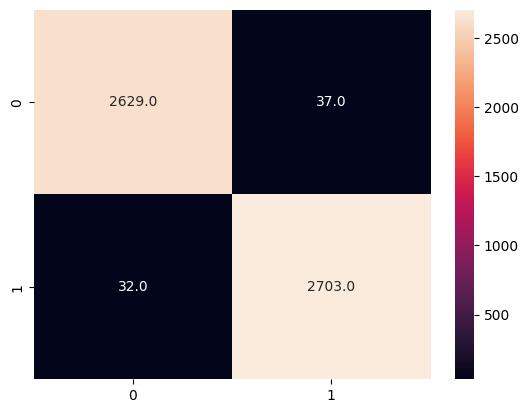

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 10},fmt=".1f")

**Precision, Recall, & F1 Score**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
# classification metrics for training data
precision_recall_f1_score(Y_train, prediction_on_training_data)

Precision = 0.9988858973168694
Recall = 0.9993498049414824
F1 Score = 0.9991177972791012


In [ ]:
# classification metrics for test data
precision_recall_f1_score(Y_test, prediction_on_test_data)

Precision = 0.9864963503649635
Recall = 0.9882998171846435
F1 Score = 0.9873972602739726


**Benchmark Analysis**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import BaggingClassifier

In [ ]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = svm.SVC(probability=True)
bc = BaggingClassifier(n_estimators=1000, random_state=42)
lrc = LogisticRegression()

In [ ]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'LR': lrc,
    'bnb': bnb,
    'svm': svc,
    'BgC': bc,
    'RF':model
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    return accuracy,precision, f1, recall

In [ ]:
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_f1, current_recall = train_classifier(clf, X_train_features,Y_train,X_test_features,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1 Score - ",current_f1)
    print("Recall - ",current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    recall_scores.append(current_recall)

For  KN
Accuracy -  0.7946676541381226
Precision -  0.7150793650793651
F1 Score -  0.829777436684574
Recall -  0.9882998171846435
For  NB
Accuracy -  0.8850212923532679
Precision -  0.9154874213836478
F1 Score -  0.8823640841068385
Recall -  0.8515539305301645
For  LR
Accuracy -  0.9664876874652842
Precision -  0.9580344332855093
F1 Score -  0.9672279558211117
Recall -  0.976599634369287
For  bnb
Accuracy -  0.9588965006480281
Precision -  0.9541019154318757
F1 Score -  0.9596510359869139
Recall -  0.9652650822669104
For  svm
Accuracy -  0.9798185521199778
Precision -  0.9753801593048516
F1 Score -  0.9801710023649263
Recall -  0.9850091407678245
For  BgC
Accuracy -  0.9853730790594334
Precision -  0.9857351865398684
F1 Score -  0.9855549460596087
Recall -  0.9853747714808044
For  RF
Accuracy -  0.987224588039252
Precision -  0.9864963503649635
F1 Score -  0.9873972602739726
Recall -  0.9882998171846435


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F1 Score': f1_scores, 'Recall': recall_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision,F1 Score,Recall
6,RF,0.987225,0.986496,0.987397,0.988300
5,BgC,0.985373,0.985735,0.985555,0.985375
4,svm,0.979819,0.975380,0.980171,0.985009
2,LR,0.966488,0.958034,0.967228,0.976600
3,bnb,0.958897,0.954102,0.959651,0.965265
1,NB,0.885021,0.915487,0.882364,0.851554
0,KN,0.794668,0.715079,0.829777,0.988300


In [ ]:
for key, value in clfs.items():
    print(key, value)

KN KNeighborsClassifier()
NB MultinomialNB()
LR LogisticRegression()
bnb BernoulliNB()
svm SVC(probability=True)
BgC BaggingClassifier(n_estimators=1000, random_state=42)
RF RandomForestClassifier(n_estimators=1000, random_state=42)


**AUC/ROC curve**

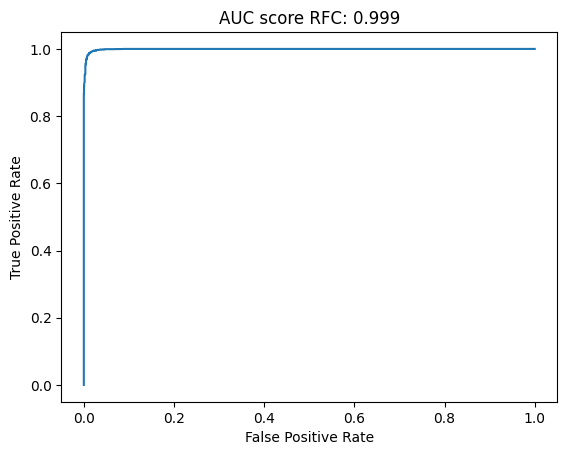

In [ ]:
# from pandas.core.dtypes.cast import maybe_unbox_datetimelike_tz_deprecation
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
# Get predicted probabilities for the test set
y_probs = model.predict_proba(X_test_features)[:, 1]
# bgc_y_probs = bc.predict_proba(X_test_features)[:, 1]
# svc_probs = svc.predict_proba (X_test_features)[:, 1]
# Compute false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
# bgc_fpr, bgc_tpr, bgc_threshold = roc_curve(Y_test, bgc_y_probs)
# svc_fpr, svc_tpr, svc_threshold = roc_curve(Y_test, svc_probs)

# Compute the AUC score
auc = roc_auc_score(Y_test, y_probs)
# bgc_auc = roc_auc_score(Y_test, bgc_y_probs)
# svc_auc = roc_auc_score(Y_test, svc_probs)

# Plot the ROC curve
plt.plot(fpr, tpr)
# plt.plot(bgc_fpr, bgc_tpr)
# plt.plot(svc_fpr, svc_tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("AUC score RFC: {:.3f}".format(auc) + ", AUC score BGC: {:.3f}".format(bgc_auc)+ ", AUC score SVM: {:.3f}".format(svc_auc))
plt.title("AUC score RFC: {:.3f}".format(auc))
plt.show()

**Building a Detection System**

In [ ]:
import re
import string
from bs4 import BeautifulSoup

def clean_text(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    
    # Remove URL's
    text = re.sub(r'http\S+', '', text)
    
    # Remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove punctuation and symbols
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Lowercase the text
    text = text.lower()
    
    # Remove extra whitespace
    text = re.sub(' +', ' ', text)
    text = text.strip()
    
    return text


In [ ]:
input_tweet = [clean_text("#NewsFirst Four masked men have dismantled an ATM machine from a private bank in Gampola and taken cash last night: Police.")]
print(input_tweet[0])
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_tweet)

# making prediction
prediction = model.predict(input_data_features)
print(prediction)

# Get class probabilities
probability = model.predict_proba(input_data_features)



if (prediction[0]==1):
  # Probability of not being a scam
  non_scam_probability = probability[0][1]
  print('Not Scam')
  print("Probability of being Not a Scam: {:.1f}%".format(non_scam_probability*100))

else:
  # Probability of being a scam
  scam_probability = probability[0][0]
  print('Potential Scam')
  print("Probability of being a Scam: {:.1f}%".format(scam_probability*100))

  

newsfirst four masked men have dismantled an atm machine from a private bank in gampola and taken cash last night police
[1]
Not Scam
Probability of being Not a Scam: 94.2%


**Save The Trained Model**

In [ ]:
import pickle
pickle.dump(feature_extraction,open('newrfcvectorizer.pkl','wb'))
pickle.dump(model,open('newrfcmodel.pkl','wb'))

In [ ]:
import bz2
# Compress the .pkl file using bzip2
with open('newrfcmodel.pkl', 'rb') as f_in:
    with bz2.open('newrfcmodel.pkl.bz2', 'wb') as f_out:
        f_out.writelines(f_in)